# Absolute % Change Distributions (per company)

This notebook analyzes the distribution of **absolute percentage change** per company for sequential 1-year windows, where the volatility used in Black–Scholes is compounded from **stock creation** (the setup that generated `abs_pct_change`).

Outputs:
- Summary table with mean/median/std + outlier counts per company
- Per-company histogram with **Normal(μ, σ)** overlay
- Outlier tables (IQR rule)


In [4]:
# Imports + load observations
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm

obs = pd.read_csv('artifacts/abs_pct_change_observations_long.csv')
obs['abs_pct_change'] = pd.to_numeric(obs['abs_pct_change'], errors='coerce')
obs = obs.dropna(subset=['company','abs_pct_change']).copy()
print('Observations:', obs.shape)
obs.head()


Observations: (1117, 9)


company                 file  window_end_index       S0     sigma  \
0      GE  GE_Vernova_us_d.csv               220  375.200  0.542257   
1  amazon      amazon_us_d.csv              6978  226.630  0.550722   
2  amazon      amazon_us_d.csv              6726  169.800  0.558459   
3  amazon      amazon_us_d.csv              6474   99.700  0.566037   
4  amazon      amazon_us_d.csv              6222  153.294  0.568807   

   option_price  future_price  pct_change  abs_pct_change  
0     85.416768        834.61   99.678367       99.678367  
1     52.316841        204.90  -32.673009       32.673009  
2     39.692391        226.65   10.104599       10.104599  
3     23.590011        170.98   47.833490       47.833490  
4     36.430446         99.54  -58.831035       58.831035

In [5]:
# Load summary + outliers produced during build step
summary = pd.read_csv('artifacts/abs_pct_change_distribution_summary_by_company.csv')
outliers = pd.read_csv('artifacts/abs_pct_change_outliers_iqr_top10_per_company.csv')

summary


company  n_obs  mean_abs_pct  median_abs_pct  std_abs_pct  min_abs_pct  \
0        plug     14    224.648540       93.669603   379.442247    17.725947   
1        enph     13    116.335032       70.540105   125.429359    11.174504   
2       tesla     15     83.869100       30.626498   129.338110     2.550853   
3      amazon     28     70.309892       28.607505   189.934064     4.147734   
4        fslr     19     63.862819       47.696469    78.575420     4.476698   
5       apple     41     42.994579       32.127474    45.123943     3.004394   
6         eog     36     32.099349       26.243545    31.266613     1.442101   
7         wmb     44     30.370105       16.434371    39.858582     0.123038   
8     walmart     53     28.911091       22.650877    26.104577     0.014167   
9   microsoft     39     27.497173       20.031939    26.408075     0.391894   
10        kmi     14     23.446549       17.127306    20.962610     0.020403   
11         gm     15     22.879657       19.661145    15.510338     4.938979   
12     target     42     22.433203       18.340663    18.915003     0.210804   
13        cop     44     20.785682       16.025014    17.391448     2.375494   
14         bp     20     19.399977       17.233955    13.975430     0.397552   
15        vde     20     18.728269       18.163176    13.293049     3.392084   
16        xle     20     18.333244       16.425940    13.145022     2.727144   
17       coke     56     17.965641       14.951288    13.163109     0.228867   
18     nasdaq     20     17.736432       10.628016    16.648767     1.009565   
19        enb     20     17.464220       14.420895    10.318834     2.296379   
20    chevron     56     16.225401       13.952440    11.891768     0.201327   
21       next     20     15.553384       13.141942    12.322890     0.595521   
22      sp500    157     15.032044       11.859475    15.240796     0.094790   
23      total     20     14.987396       14.747064     9.790147     0.255980   
24   dowjones    133     14.915195       11.013537    13.711202     0.489686   
25    general     42     14.189150       10.334784    12.113020     0.746054   
26      exxon     56     13.935508       10.423507    11.636705     1.709670   
27      pepsi     49     13.679707       11.877779    11.588939     0.171278   
28    corteva      6     12.873774        5.820680    13.557502     0.550252   
29      shell      4      7.993363        6.796981     2.865327     6.121492   

    q1_abs_pct  q3_abs_pct  max_abs_pct  iqr_abs_pct    iqr_low    iqr_high  \
0    61.576901  112.687370  1292.806557    51.110468 -15.088801  189.353072   
1    53.973076  119.182030   405.997286    65.208954 -43.840354  216.995460   
2    12.947601   55.494381   394.043146    42.546780 -50.872569  119.314551   
3    21.217356   48.334363  1032.214869    27.117007 -19.458154   89.009873   
4    22.747520   62.199190   364.557225    39.451670 -36.429985  121.376695   
5    10.654248   58.272337   243.311437    47.618089 -60.772886  129.699471   
6    13.225400   36.906320   171.488810    23.680920 -22.295980   72.427701   
7     6.030333   36.072118   218.430463    30.041786 -39.032346   81.134797   
8     7.468783   42.947210    97.398469    35.478427 -45.748857   96.164851   
9    11.242272   34.022777   113.240234    22.780505 -22.928486   68.193535   
10    9.433915   38.358136    75.501126    28.924222 -33.952418   81.744469   
11    9.090904   33.529134    54.841659    24.438230 -27.566441   70.186479   
12    7.665666   31.119212    80.251675    23.453546 -27.514654   66.299531   
13    7.224148   27.824025    81.496317    20.599878 -23.675669   58.723841   
14    9.997204   27.132390    48.200562    17.135186 -15.705576   52.835170   
15    5.830837   22.940864    46.177127    17.110027 -19.834204   48.605905   
16    8.250085   22.677720    47.005669    14.427635 -13.391368   44.319172   
17    6.735319   27.269881    48.821141    20.534562 -24.066525   58.071725   
18    5.195351   24.3184

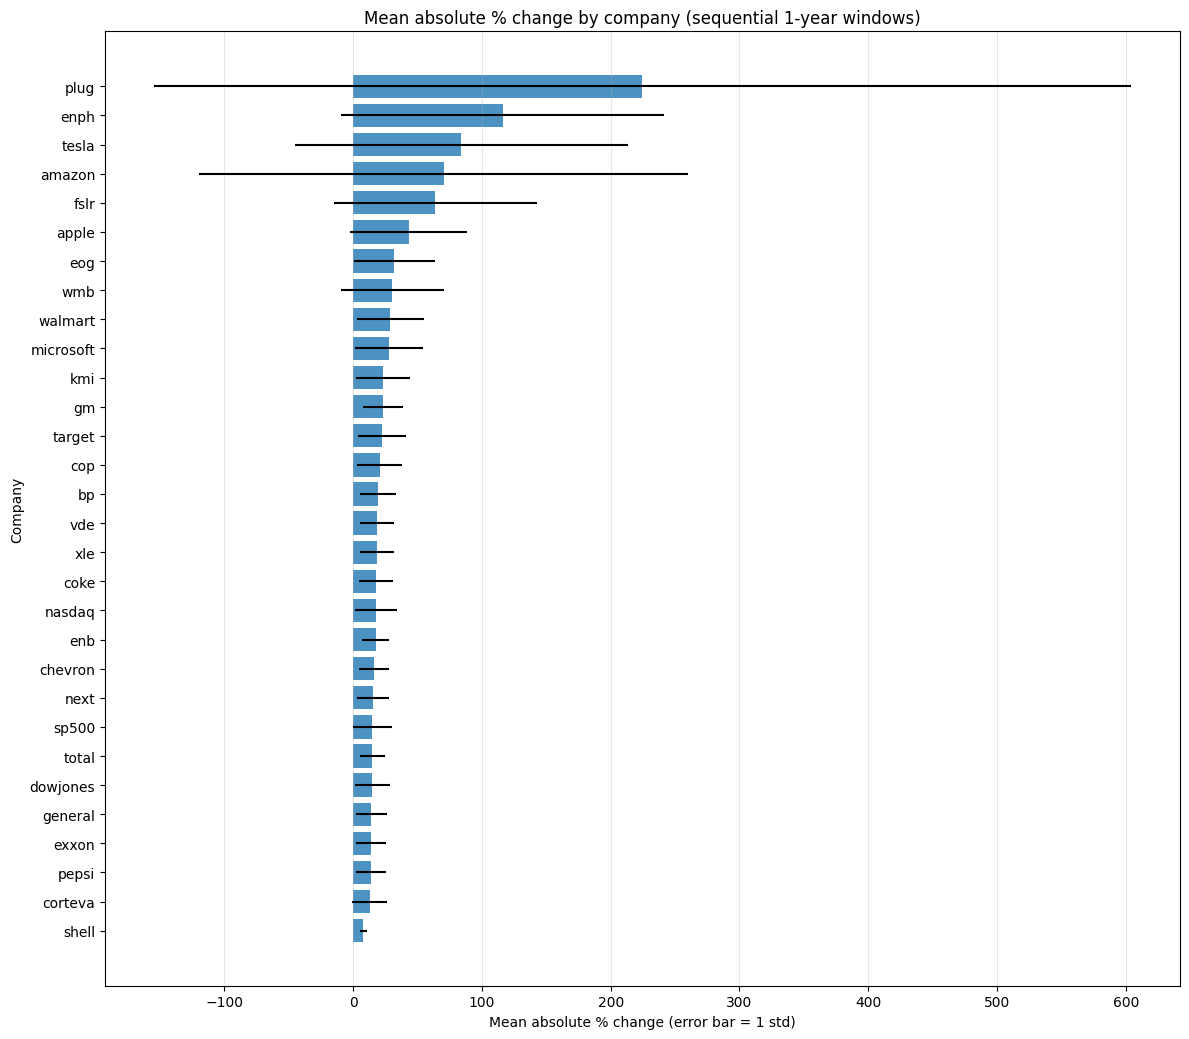

In [6]:
# Quick bar chart: mean absolute % change by company (with +/- 1 std)
plt.figure(figsize=(12, max(5, 0.35*len(summary))))
summary_plot = summary.sort_values('mean_abs_pct', ascending=True)
plt.barh(summary_plot['company'], summary_plot['mean_abs_pct'], xerr=summary_plot['std_abs_pct'], alpha=0.8)
plt.xlabel('Mean absolute % change (error bar = 1 std)')
plt.ylabel('Company')
plt.title('Mean absolute % change by company (sequential 1-year windows)')
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()


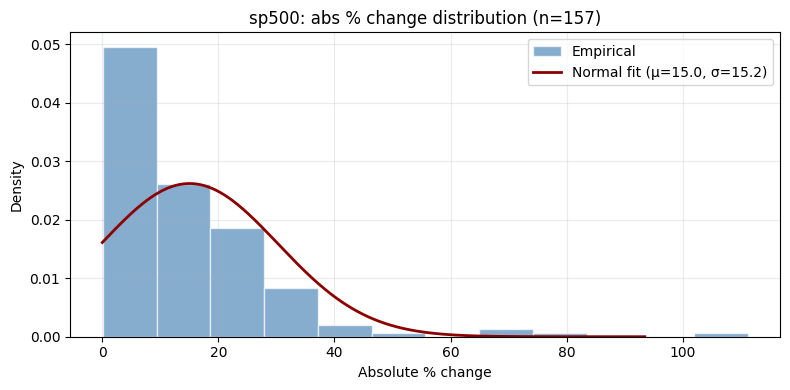

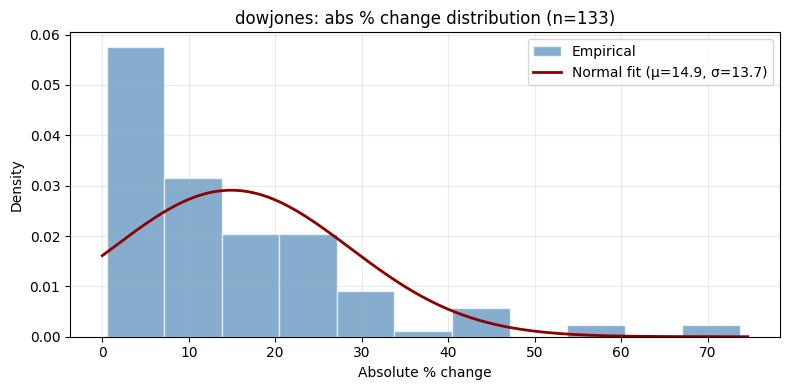

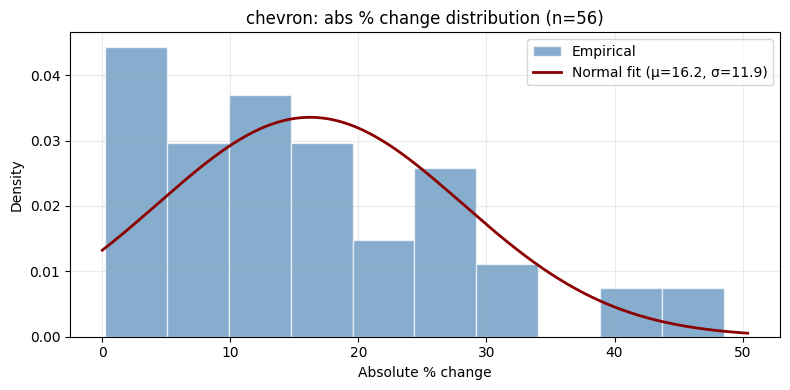

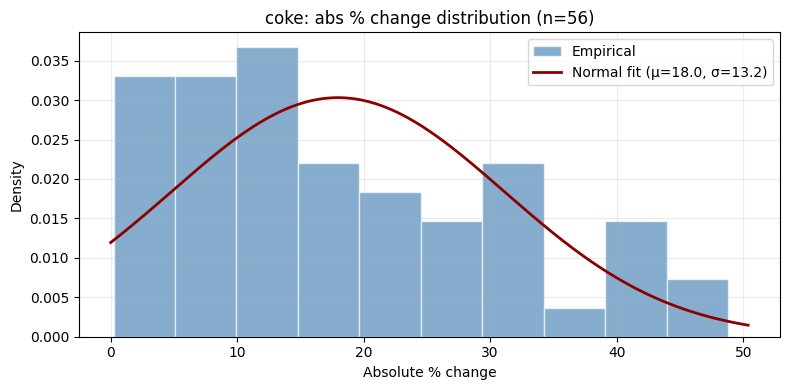

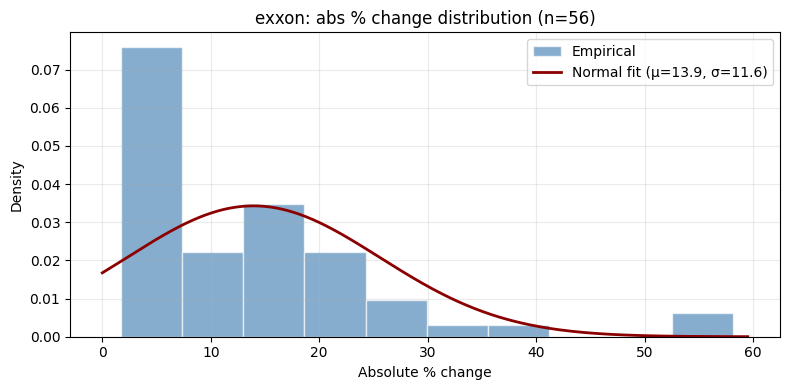

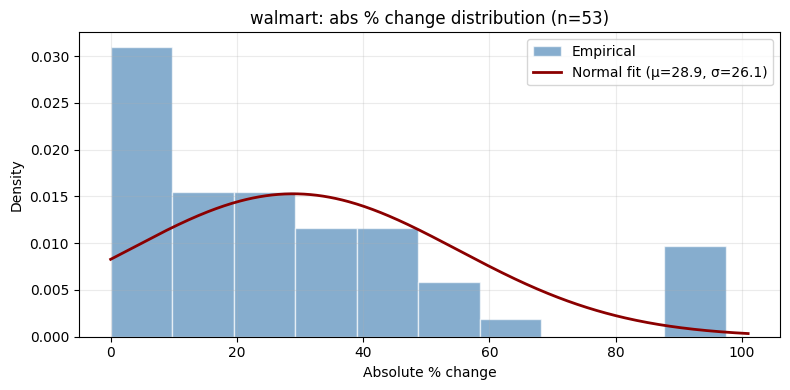

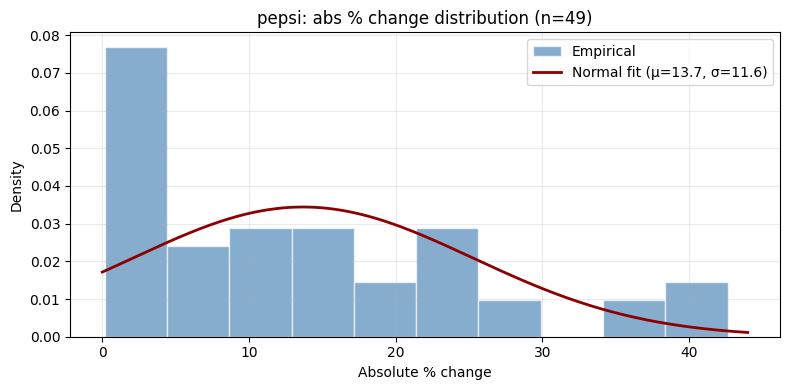

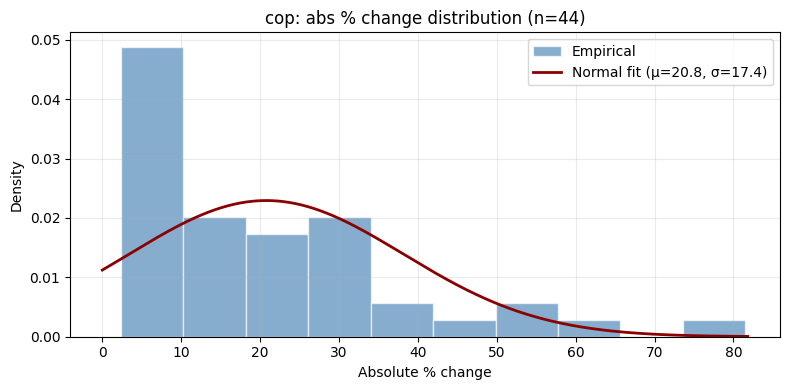

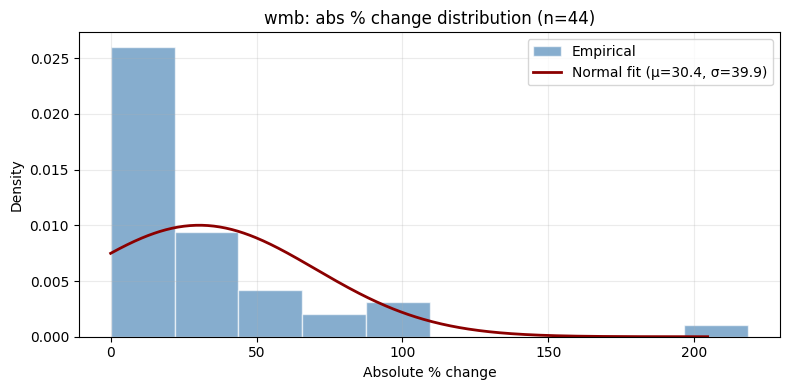

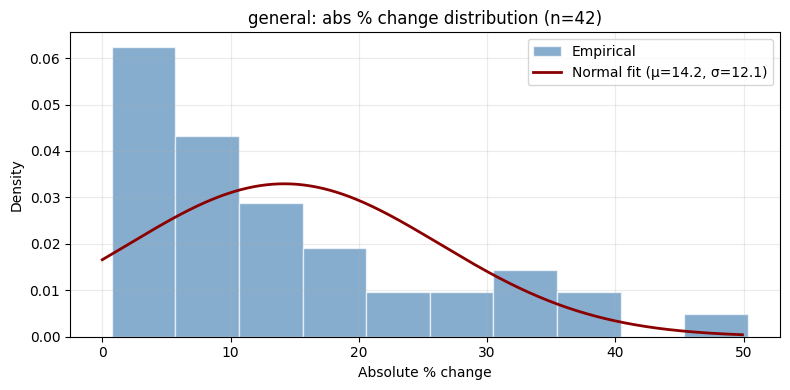

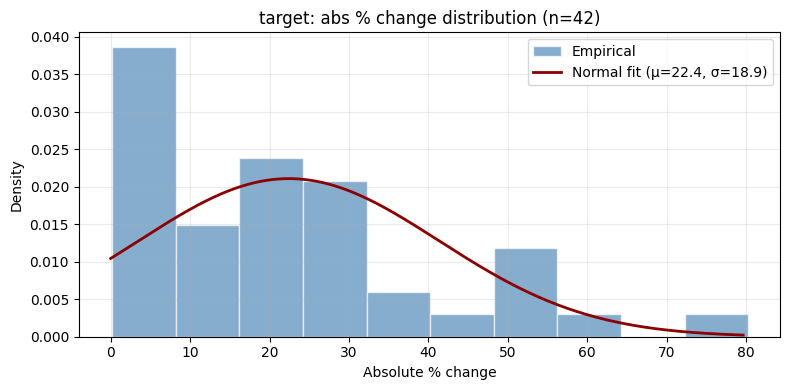

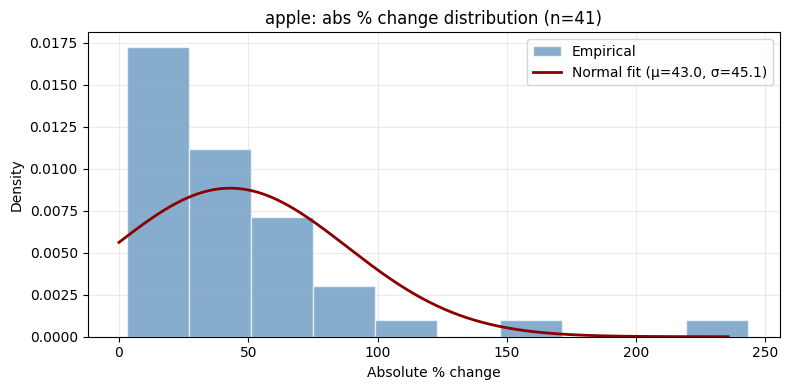

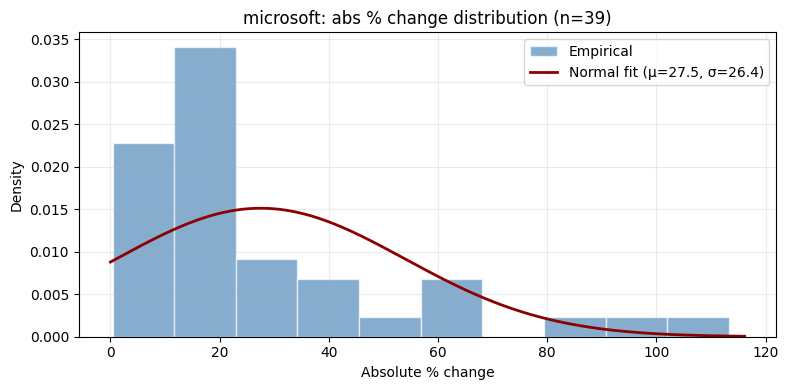

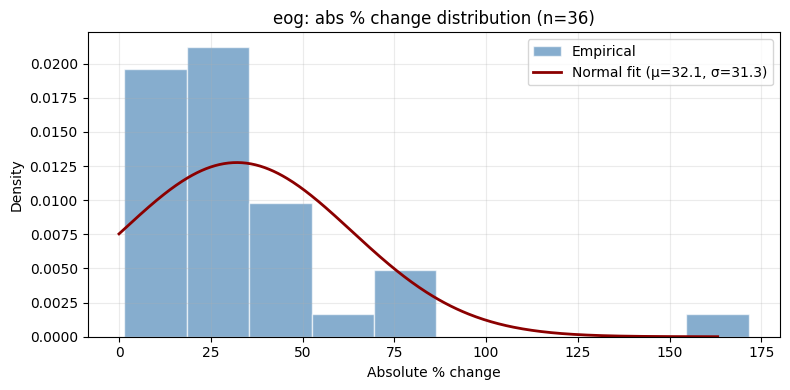

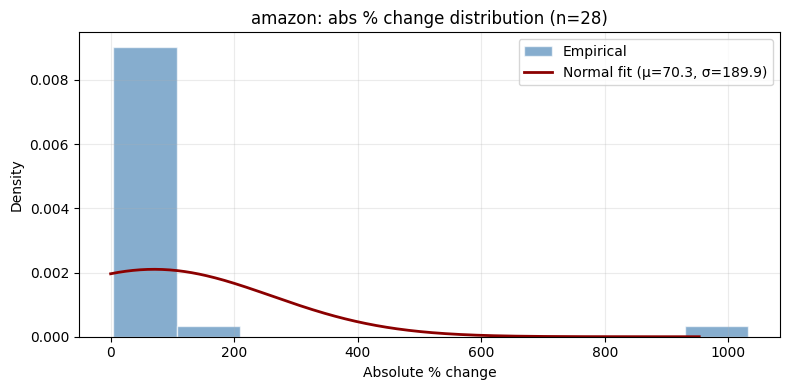

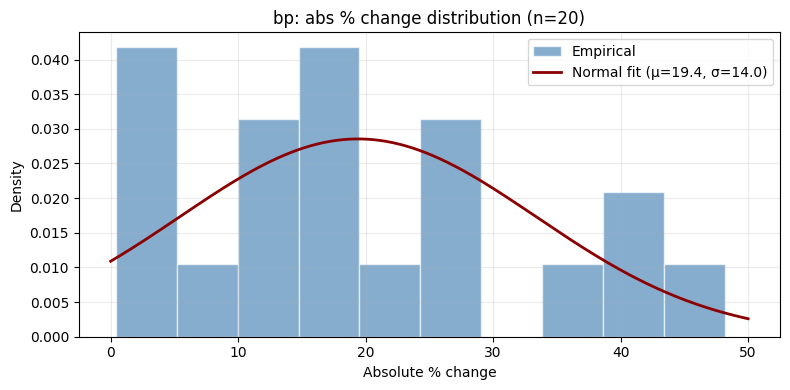

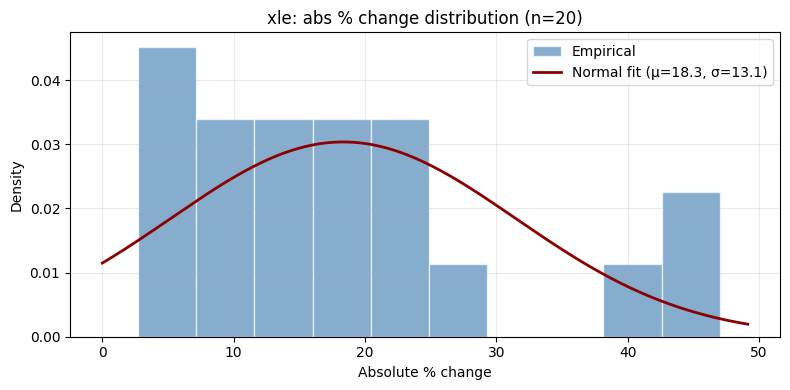

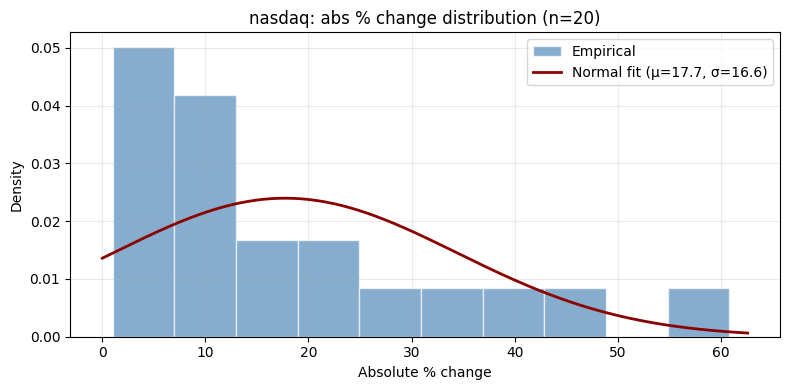

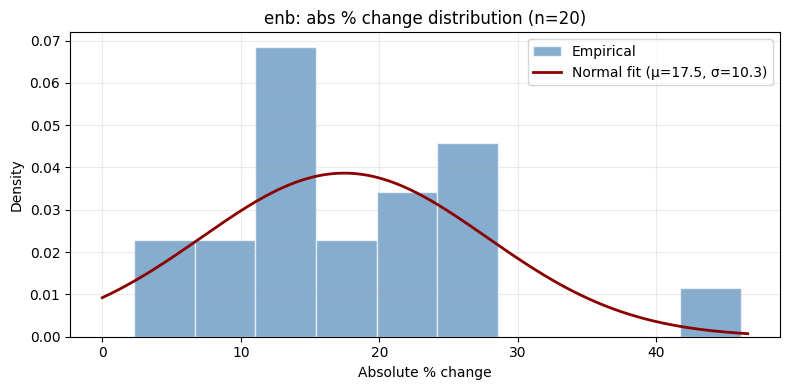

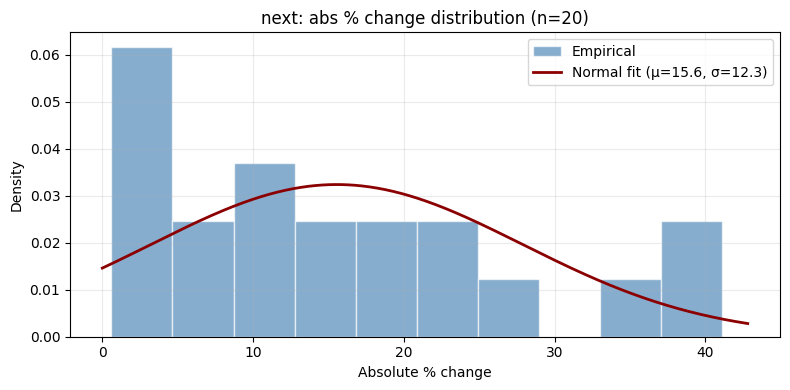

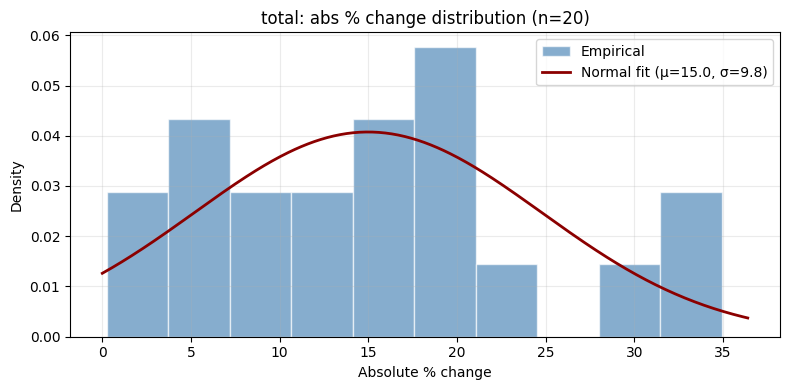

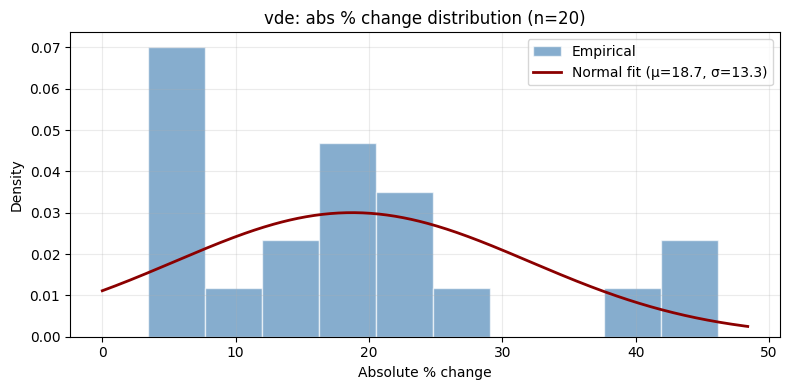

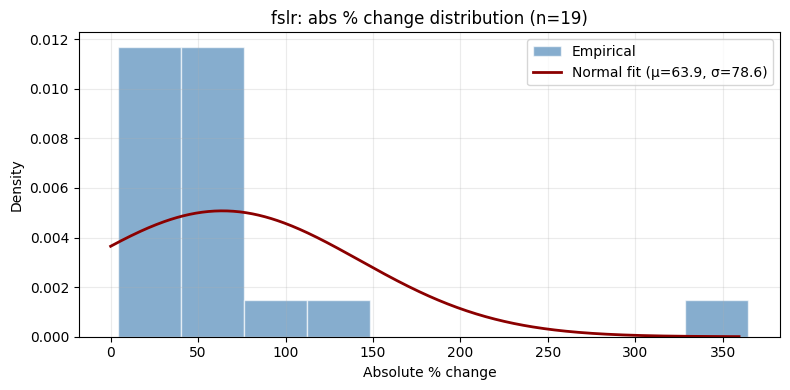

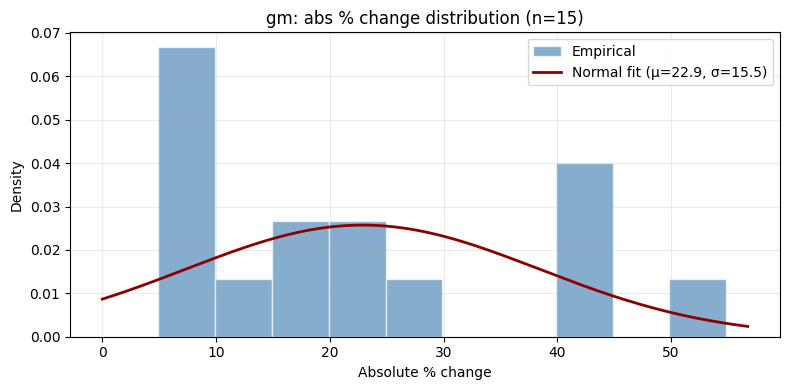

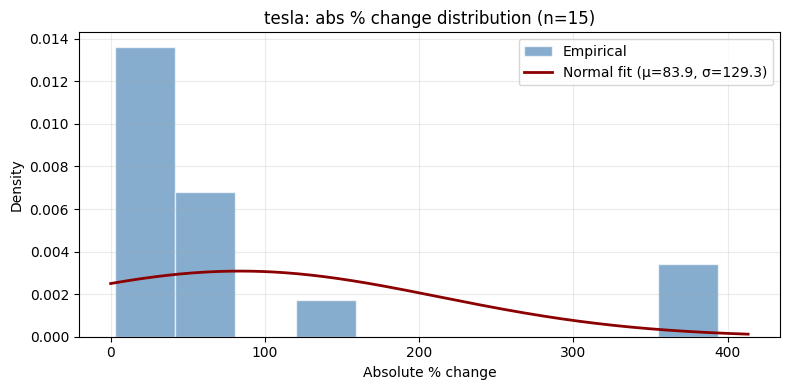

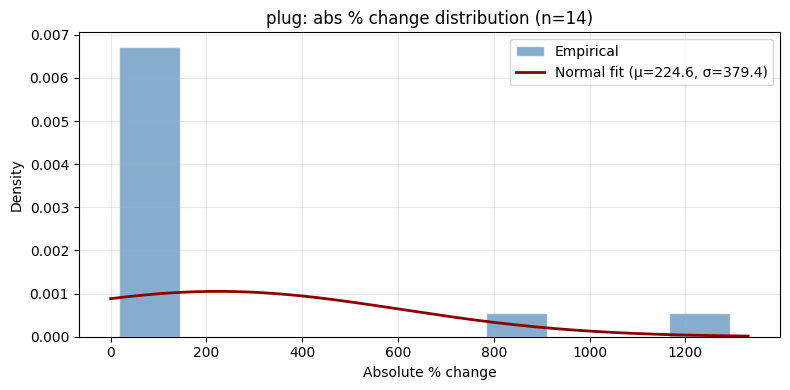

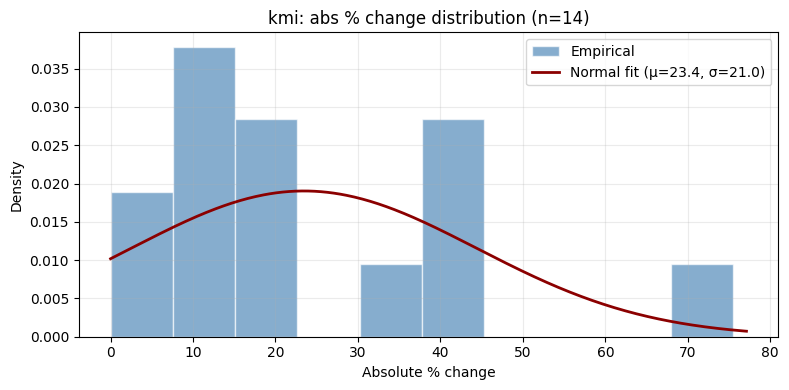

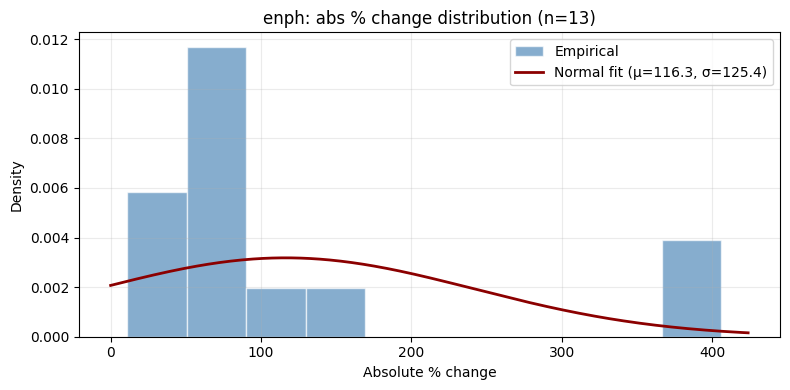

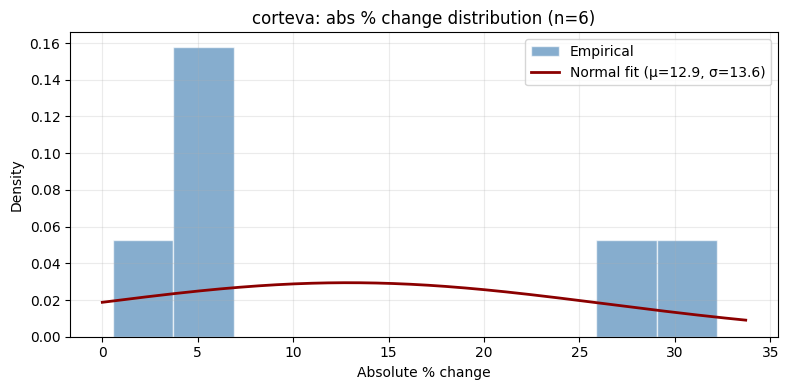

In [7]:
# Per-company distribution plots (hist + Normal overlay)
# Note: abs_pct_change is nonnegative, so a Normal fit is a descriptive overlay (not necessarily a good generative model).

companies = summary.sort_values('n_obs', ascending=False)['company'].tolist()

for company in companies:
    x = obs.loc[obs['company'] == company, 'abs_pct_change'].dropna().astype(float).values
    if len(x) < 5:
        continue
    mu = x.mean()
    sd = x.std(ddof=1)

    # Histogram
    plt.figure(figsize=(8, 4))
    bins = min(30, max(10, int(np.sqrt(len(x)))))
    plt.hist(x, bins=bins, density=True, alpha=0.65, color='steelblue', edgecolor='white', label='Empirical')

    # Normal overlay
    xs = np.linspace(0, np.percentile(x, 99.5) * 1.05, 400)
    if sd > 0:
        plt.plot(xs, norm.pdf(xs, loc=mu, scale=sd), color='darkred', lw=2, label=f'Normal fit (μ={mu:.1f}, σ={sd:.1f})')

    plt.title(f'{company}: abs % change distribution (n={len(x)})')
    plt.xlabel('Absolute % change')
    plt.ylabel('Density')
    plt.grid(alpha=0.25)
    plt.legend()
    plt.tight_layout()
    plt.show()


In [ ]:
# Outliers (IQR rule): top examples per company
outliers


## Outlier waveform plots
These plots show % change across yearly windows; outlier windows are highlighted in red.


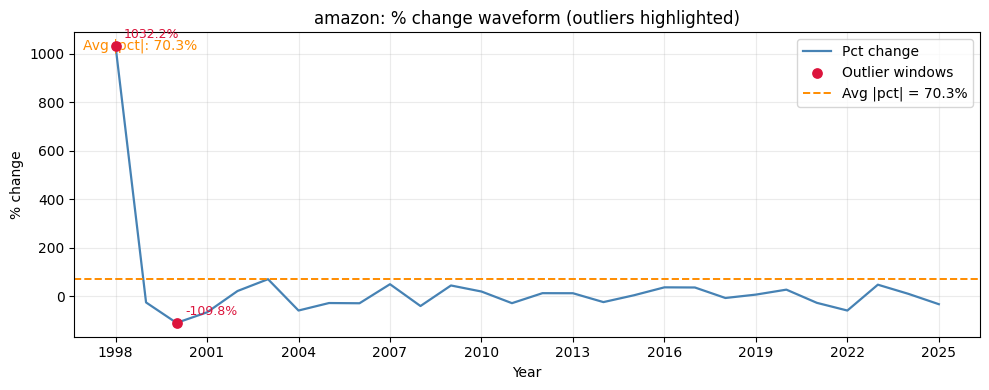

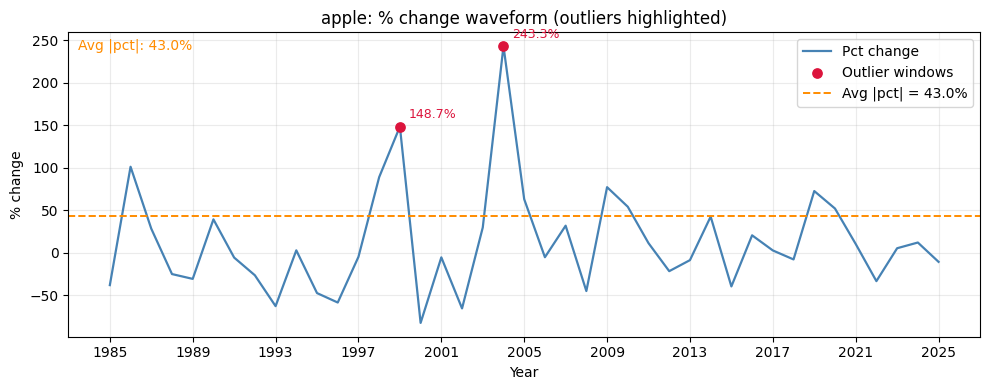

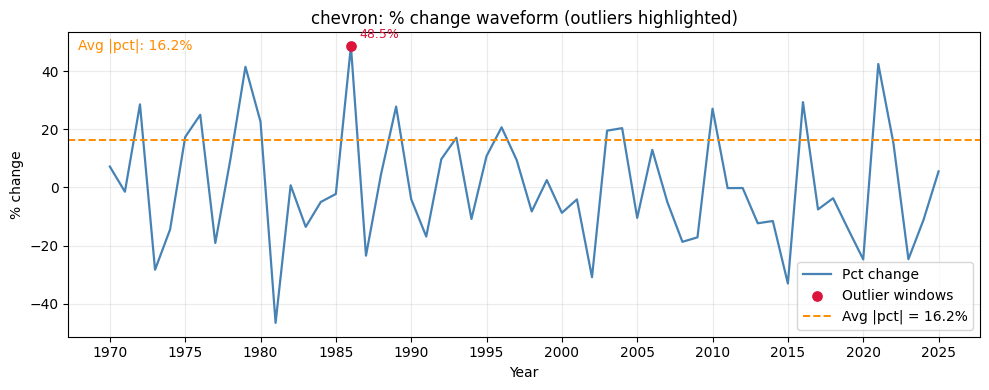

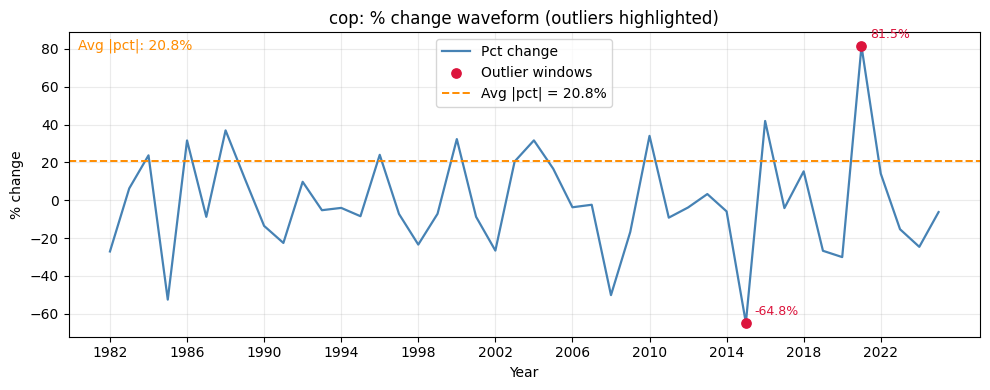

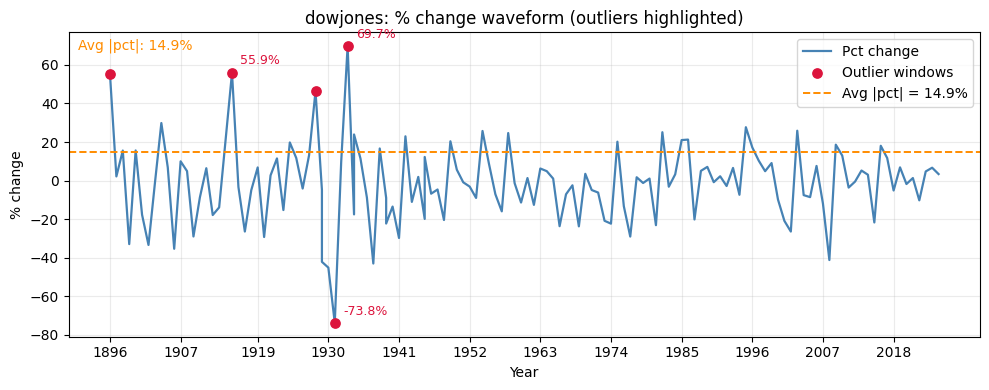

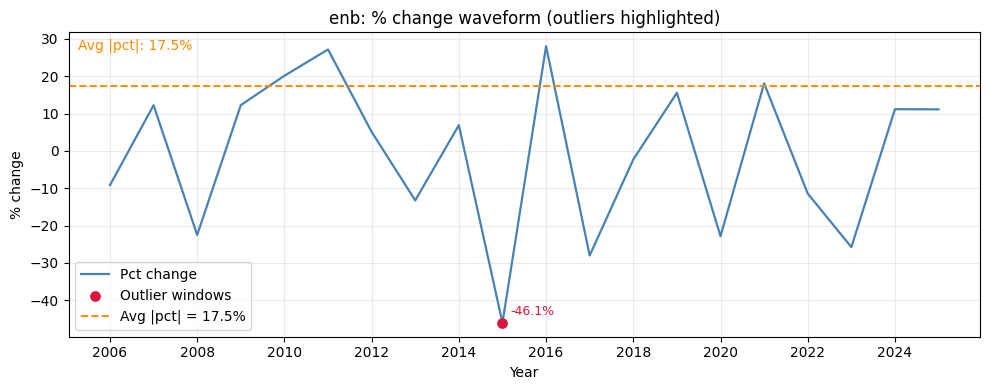

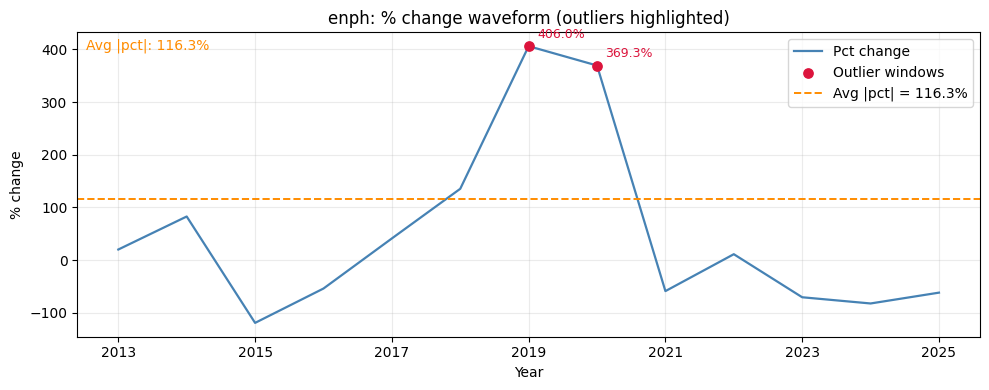

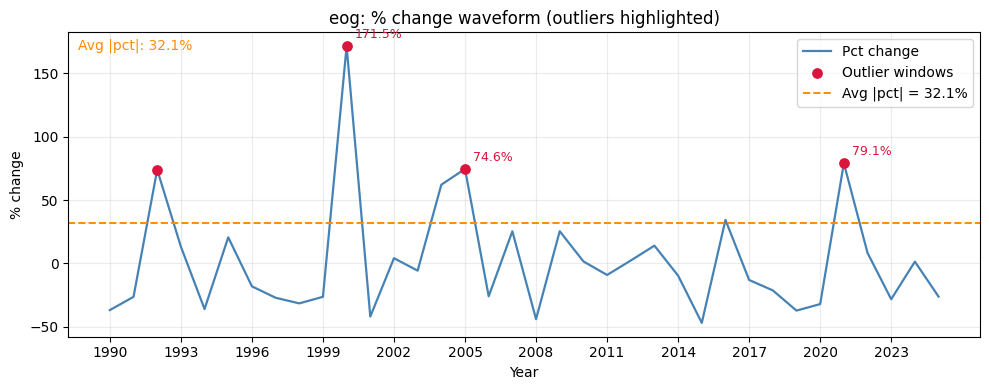

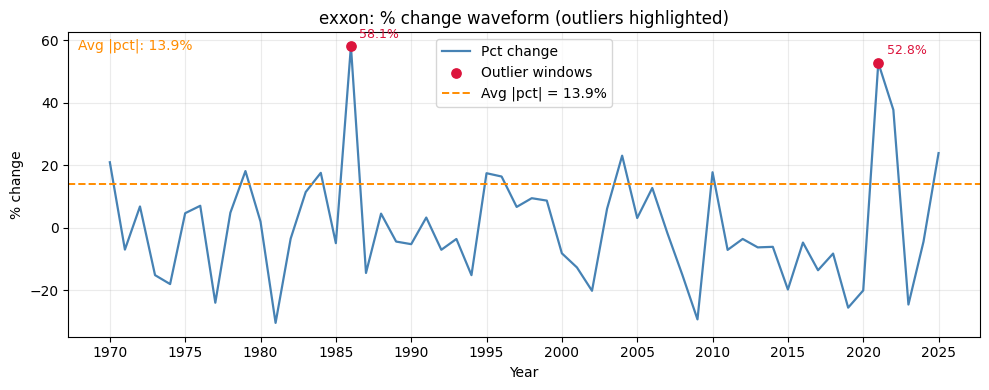

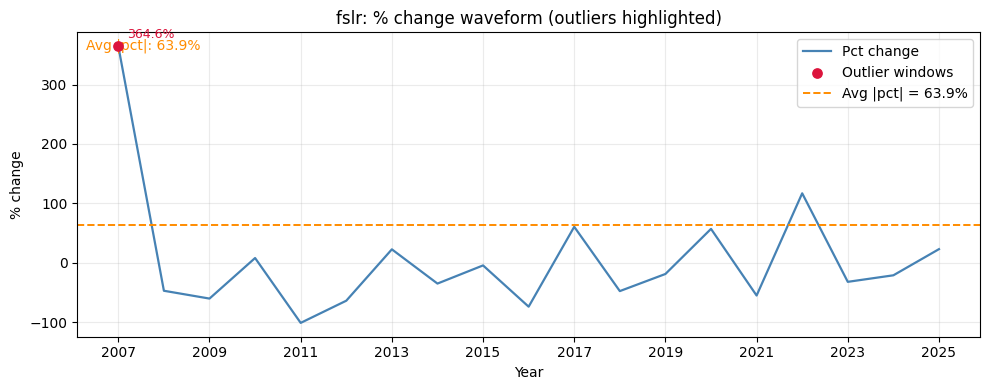

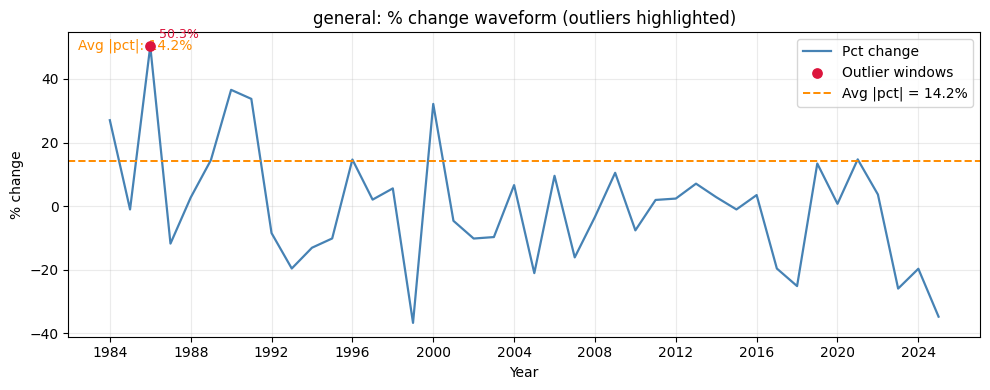

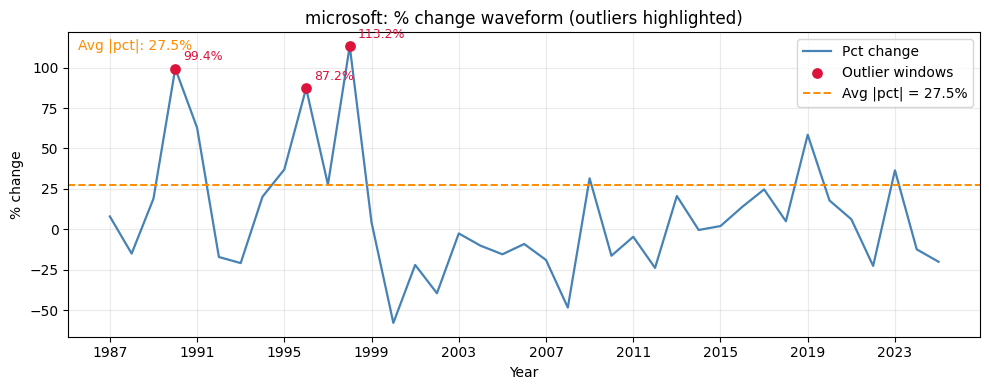

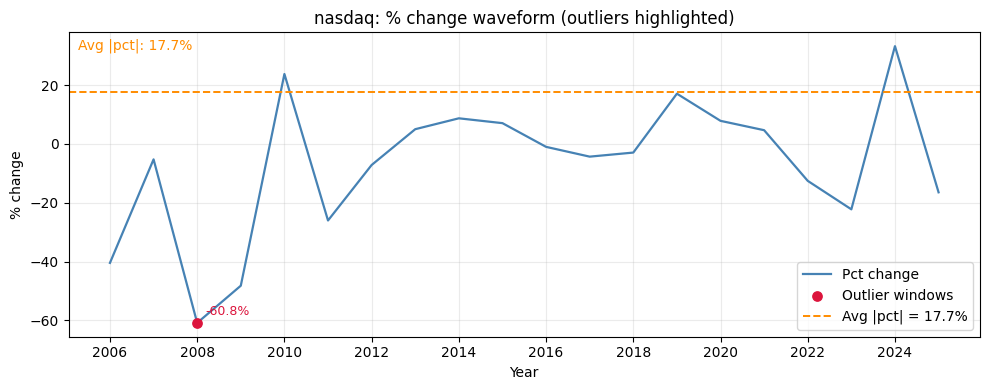

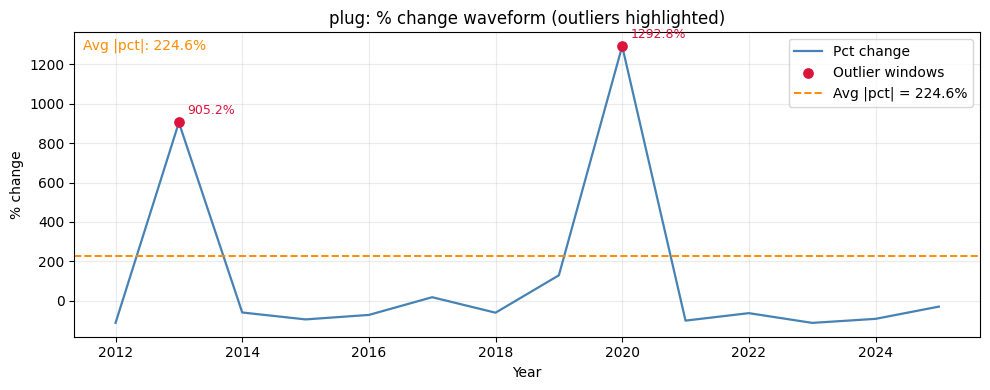

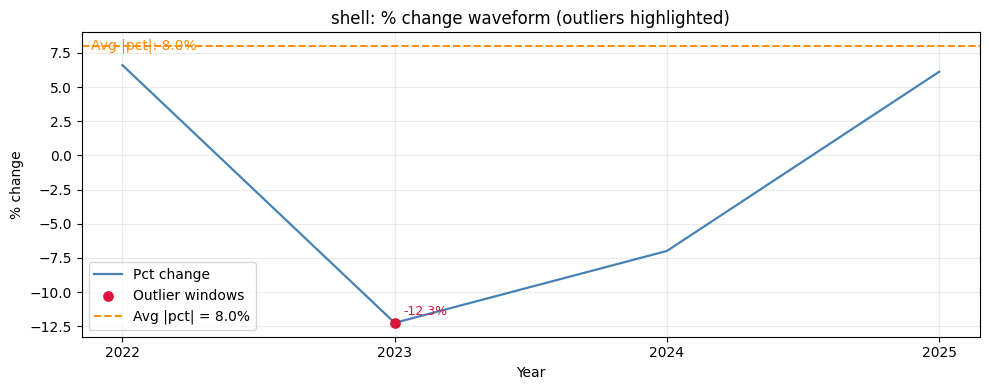

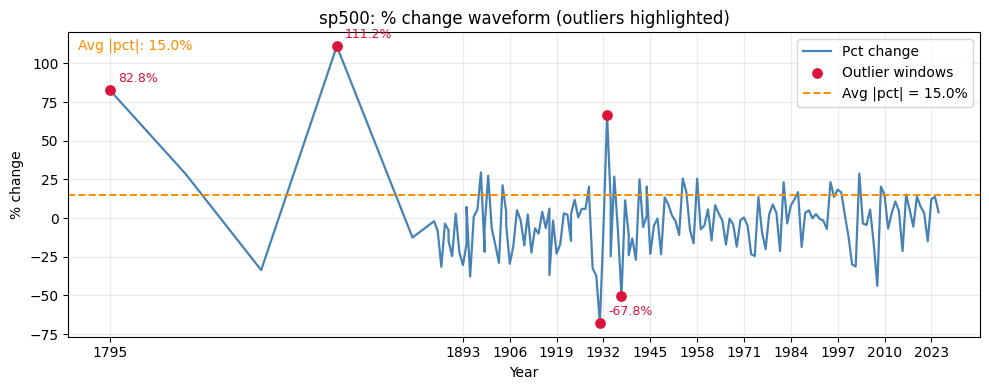

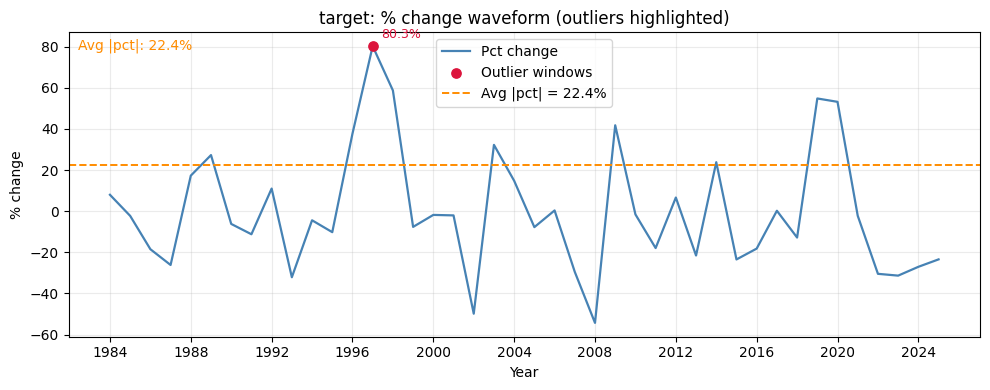

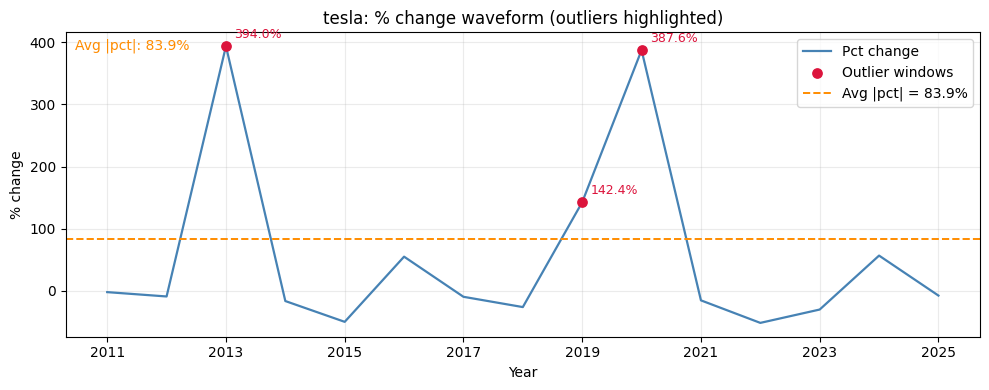

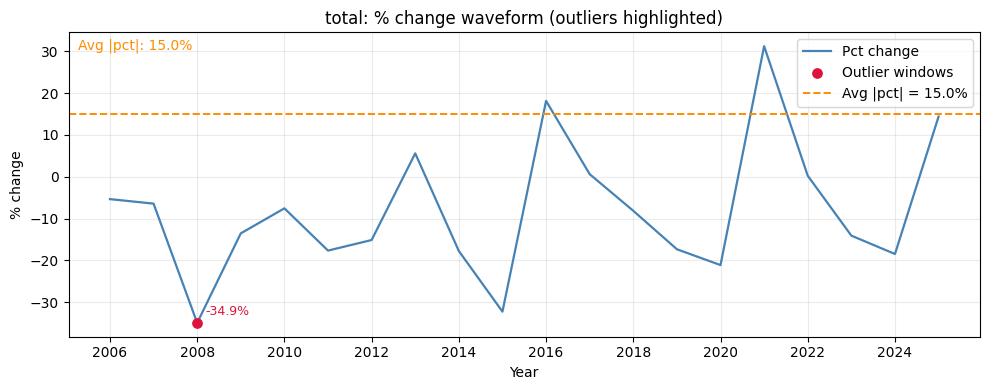

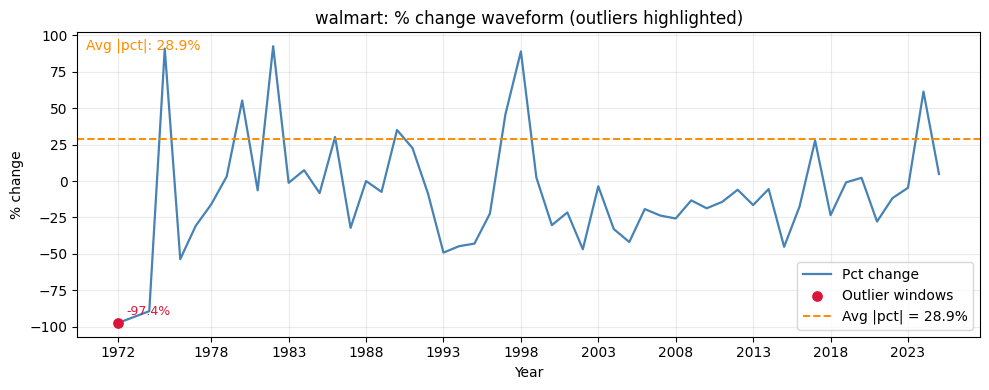

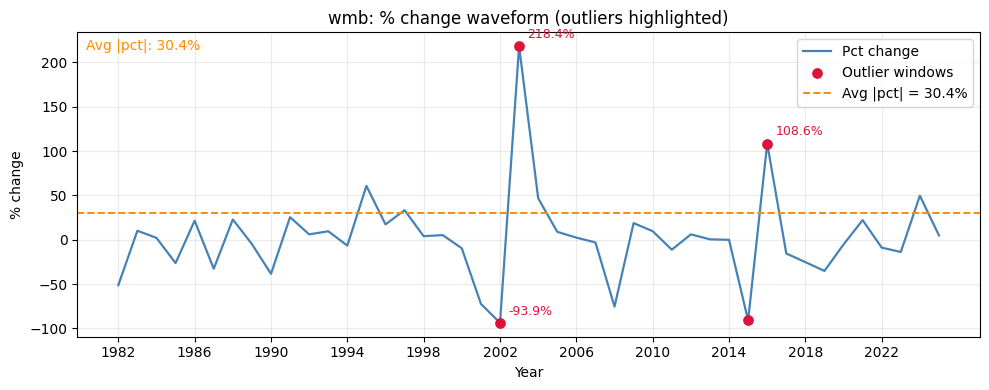

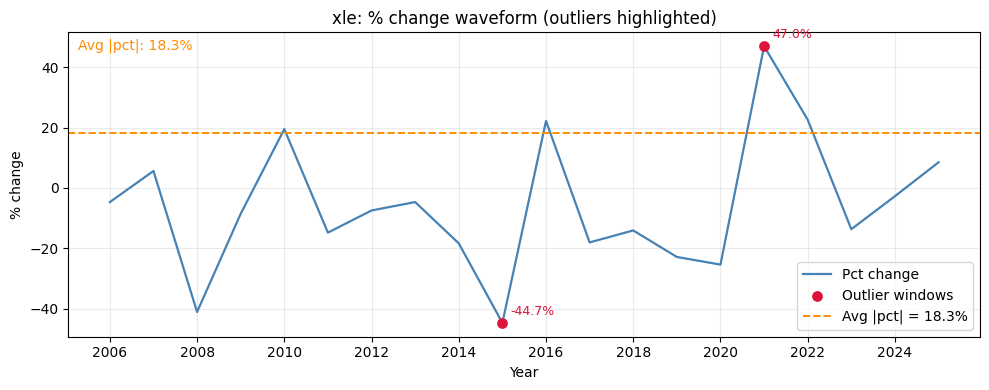

In [8]:
# Waveform plots for outlier-heavy companies (x-axis = calendar year from first column of each company CSV; include company avg |pct|)

import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

ART_DIR = 'artifacts'
COMP_DIR = 'Companies'
obs_fp = os.path.join(ART_DIR, 'obs_long_clean.csv')
out_fp = os.path.join(ART_DIR, 'outliers.csv')

# --- Load observations + outliers (prefer artifacts; fall back to in-memory)
if os.path.exists(obs_fp):
    obs_df = pd.read_csv(obs_fp)
elif 'obs_long_clean' in globals():
    obs_df = obs_long_clean.copy()
else:
    raise FileNotFoundError(f'Could not find {obs_fp} and obs_long_clean is not in memory.')

if os.path.exists(out_fp):
    out_df = pd.read_csv(out_fp)
elif 'outliers' in globals():
    out_df = outliers.copy()
elif 'outliers_df' in globals():
    out_df = outliers_df.copy()
else:
    raise FileNotFoundError(f'Could not find {out_fp} and no outliers dataframe is in memory.')

# Ensure expected columns
obs_df['window_end_index'] = pd.to_numeric(obs_df['window_end_index'], errors='coerce')
out_df['window_end_index'] = pd.to_numeric(out_df['window_end_index'], errors='coerce')

# Companies to plot: those with at least one outlier
companies_to_plot = sorted(out_df['company'].dropna().unique().tolist())

def build_year_map_for_file(file_path: str) -> dict:
    """Map window_end_index -> calendar year using the company CSV's first column (Date).
    Assumes obs_df.window_end_index refers to a row index in the original company CSV.
    """
    dfp = pd.read_csv(file_path)
    # Use first column as date-like (per request)
    date_col = dfp.columns[0]
    dt = pd.to_datetime(dfp[date_col], errors='coerce')
    years = dt.dt.year
    # index in dfp corresponds to window_end_index
    return dict(zip(dfp.index.astype(int), years.astype('Int64')))

# Plot per company
for c in companies_to_plot:
    dfi = obs_df[obs_df['company'] == c].copy()
    if dfi.empty:
        continue

    # Find the underlying price file to get Date/year
    file_name = dfi['file'].dropna().iloc[0] if 'file' in dfi.columns and dfi['file'].notna().any() else None
    if not file_name:
        continue

    price_fp = os.path.join(COMP_DIR, file_name)
    if not os.path.exists(price_fp):
        # If Companies/ missing, skip rather than failing the whole cell
        continue

    year_map = build_year_map_for_file(price_fp)

    dfi['pct_change'] = pd.to_numeric(dfi['pct_change'], errors='coerce')
    dfi['abs_pct_change'] = pd.to_numeric(dfi['abs_pct_change'], errors='coerce')
    dfi['_year'] = dfi['window_end_index'].astype('Int64').map(year_map)

    # If year mapping failed (NaNs), we still plot by window_end_index as fallback
    x = dfi['_year']
    use_year = x.notna().any()
    if not use_year:
        x = dfi['window_end_index']

    dfi['_x'] = x
    dfi = dfi.sort_values('_x')

    avg_abs = float(dfi['abs_pct_change'].dropna().mean()) if dfi['abs_pct_change'].notna().any() else np.nan

    out_c = out_df[out_df['company'] == c].copy()
    out_idx = set(out_c['window_end_index'].dropna().astype(int).tolist())
    is_out = dfi['window_end_index'].dropna().astype(int).isin(out_idx)

    fig, ax = plt.subplots(figsize=(10, 4))
    ax.plot(dfi['_x'], dfi['pct_change'], color='steelblue', linewidth=1.6, label='Pct change')

    if is_out.any():
        ax.scatter(dfi.loc[is_out, '_x'], dfi.loc[is_out, 'pct_change'],
                   color='crimson', s=45, zorder=5, label='Outlier windows')
        ann = dfi.loc[is_out, ['_x', 'pct_change', 'abs_pct_change']].copy()
        ann = ann.sort_values('abs_pct_change', ascending=False).head(3)
        for _, r in ann.iterrows():
            ax.annotate(f"{r['pct_change']:.1f}%", (r['_x'], r['pct_change']),
                        textcoords='offset points', xytext=(6, 6), fontsize=9, color='crimson')

    if not np.isnan(avg_abs):
        ax.axhline(avg_abs, color='darkorange', linestyle='--', linewidth=1.4,
                   label=f'Avg |pct| = {avg_abs:.1f}%')
        ax.text(0.01, 0.98, f"Avg |pct|: {avg_abs:.1f}%", transform=ax.transAxes,
                ha='left', va='top', fontsize=10, color='darkorange')

    ax.set_title(f"{c}: % change waveform (outliers highlighted)")
    ax.set_xlabel('Year' if use_year else 'window_end_index')
    ax.set_ylabel('% change')
    ax.grid(True, alpha=0.25)

    if use_year:
        years = np.unique(dfi['_year'].dropna().astype(int).values)
        if len(years) > 12:
            step = int(np.ceil(len(years) / 12))
            years = years[::step]
        ax.set_xticks(years)

    ax.legend(loc='best')
    plt.tight_layout()
    plt.show()


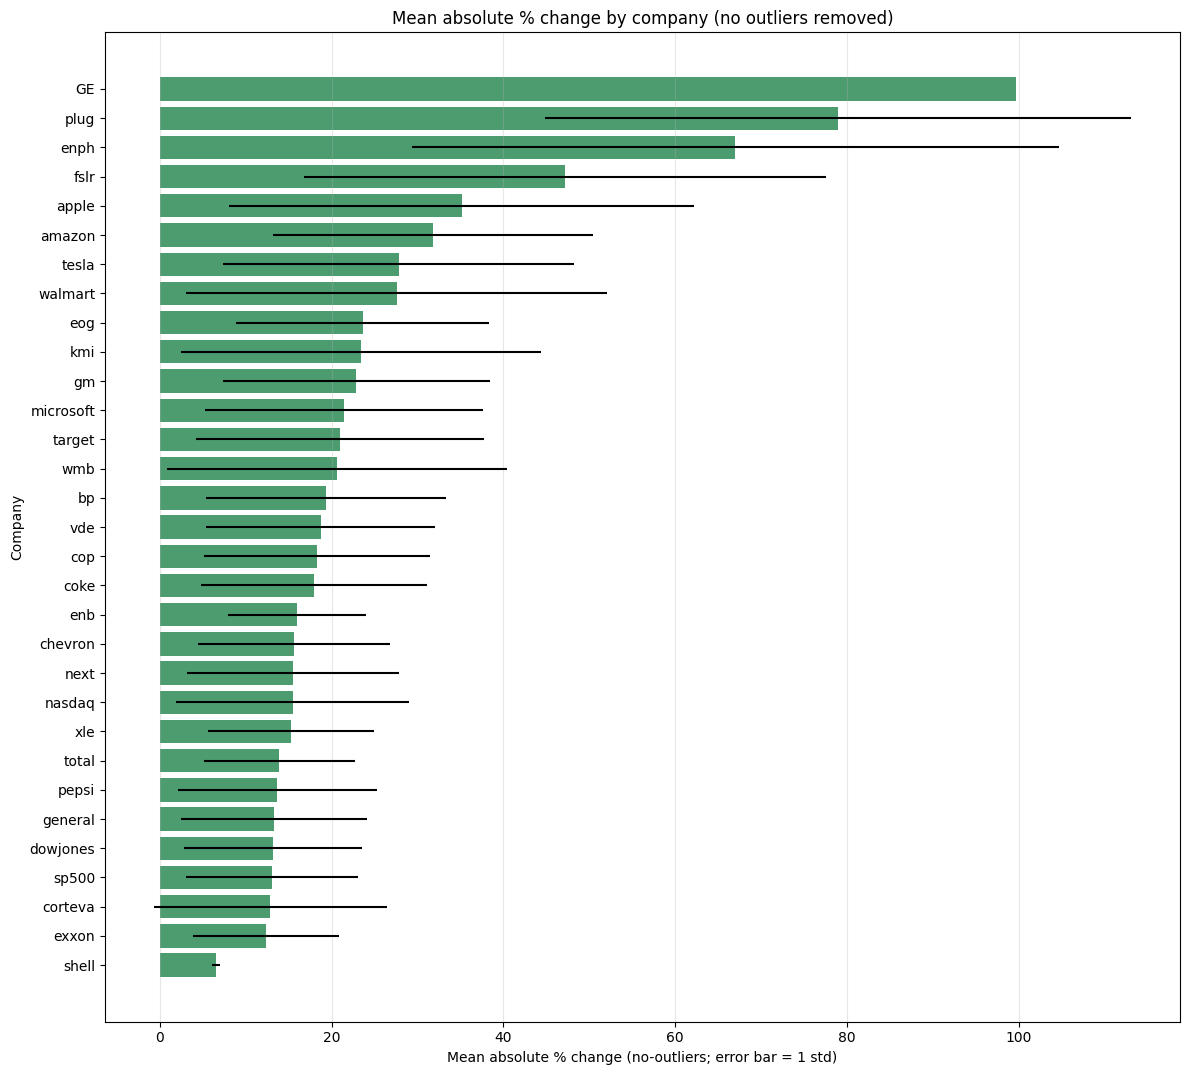

Saved figure: artifacts/barplot_mean_abs_pct_no_outliers.png
Wrote notebook: artifacts/no_outliers_barplot.ipynb


In [3]:
# Create bar plot from no-outlier summary and write a new plotting notebook (.ipynb)
import os
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

ART_DIR = 'artifacts'
os.makedirs(ART_DIR, exist_ok=True)

# Load no-outlier summary (prefer file to ensure we're using the updated artifact)
summary_fp = os.path.join(ART_DIR, 'summary_no_outliers.csv')
summary_no_out_plot = pd.read_csv(summary_fp)

# --- Bar plot (mean with +/- 1 std)
summary_plot = summary_no_out_plot.sort_values('mean_abs_pct', ascending=True).copy()

plt.figure(figsize=(12, max(5, 0.35 * len(summary_plot))))
plt.barh(
    summary_plot['company'],
    summary_plot['mean_abs_pct'],
    xerr=summary_plot['std_abs_pct'],
    alpha=0.85,
    color='seagreen'
)
plt.xlabel('Mean absolute % change (no-outliers; error bar = 1 std)')
plt.ylabel('Company')
plt.title('Mean absolute % change by company (no outliers removed)')
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()

fig_fp = os.path.join(ART_DIR, 'barplot_mean_abs_pct_no_outliers.png')
plt.savefig(fig_fp, dpi=200, bbox_inches='tight')
plt.show()

print(f"Saved figure: {fig_fp}")

# --- Create a new standalone notebook file to reproduce this plot
nb = {
    "cells": [
        {
            "cell_type": "markdown",
            "metadata": {},
            "source": [
                "# No-outliers Absolute % Change Bar Plot\n",
                "\n",
                "This notebook loads `artifacts/summary_no_outliers.csv` and plots mean absolute % change by company with ±1 std error bars.\n"
            ]
        },
        {
            "cell_type": "code",
            "execution_count": None,
            "metadata": {},
            "outputs": [],
            "source": [
                "import os\n",
                "import pandas as pd\n",
                "import matplotlib.pyplot as plt\n",
                "\n",
                "ART_DIR = 'artifacts'\n",
                "summary_fp = os.path.join(ART_DIR, 'summary_no_outliers.csv')\n",
                "summary = pd.read_csv(summary_fp)\n",
                "summary_plot = summary.sort_values('mean_abs_pct', ascending=True)\n",
                "\n",
                "plt.figure(figsize=(12, max(5, 0.35 * len(summary_plot))))\n",
                "plt.barh(summary_plot['company'], summary_plot['mean_abs_pct'], xerr=summary_plot['std_abs_pct'],\n",
                "         alpha=0.85, color='seagreen')\n",
                "plt.xlabel('Mean absolute % change (no-outliers; error bar = 1 std)')\n",
                "plt.ylabel('Company')\n",
                "plt.title('Mean absolute % change by company (no outliers removed)')\n",
                "plt.grid(axis='x', alpha=0.3)\n",
                "plt.tight_layout()\n",
                "plt.show()\n",
                "\n",
                "out_fp = os.path.join(ART_DIR, 'barplot_mean_abs_pct_no_outliers.png')\n",
                "plt.savefig(out_fp, dpi=200, bbox_inches='tight')\n",
                "print('Saved:', out_fp)\n"
            ]
        }
    ],
    "metadata": {
        "kernelspec": {
            "display_name": "Python 3",
            "language": "python",
            "name": "python3"
        },
        "language_info": {
            "name": "python",
            "version": "3.x"
        }
    },
    "nbformat": 4,
    "nbformat_minor": 5
}

nb_fp = os.path.join(ART_DIR, 'no_outliers_barplot.ipynb')
with open(nb_fp, 'w', encoding='utf-8') as f:
    json.dump(nb, f, ensure_ascii=False, indent=2)

print(f"Wrote notebook: {nb_fp}")
